In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
## Parameter Values
S_0 = 400  # spot price at time_0
K = 420  # strike price
T = 1.0  # T-t
r = 0.05  # riskfree rate
sigma = 0.2  # volatility
n = 100 #time steps
I = 10000  # number of iterations
dt = T/n

### Closed Form MC

In [11]:
#Initialize the variables
C = 0
#Variables to capture the expected Spot price at time T
temp = 0
Convergence = []


#Closed form solution
# Generate an array of Standard Normally distributed random numbers
phi = np.random.standard_normal(I)  
S_T = S_0 * np.exp((r - 0.5 * (sigma ** 2)) * T + sigma * np.sqrt(T) * phi)

# index values at maturity
payoff = np.maximum(S_T - K, 0)  # inner values at maturity
C = np.sum(payoff)/I  # Strong Kolmogorov law of large numbers Expectation equal to average
C = (np.exp(-r * T))*C

#Capture the expected Spot price at time T for the Convergence diagram
for i in range(I):
    temp += S_T[i]
    Convergence.append(temp/(i+1))


In [12]:
#discounted Convergence array
Convergence = np.array(Convergence)*np.exp(-r*T)
iteration = np.arange(I)+1



 Call Option value using closed form : 31.248880249947828


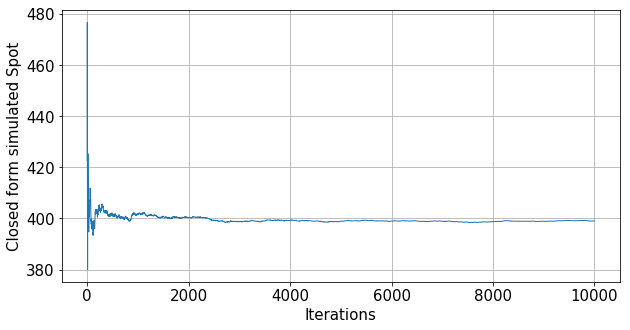

In [13]:
#plot discounted Convergence vs number of iterations
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(iteration,Convergence,lw=1)
plt.xlabel('Iterations')
plt.ylabel('Closed form simulated Spot');
print('\n\n Call Option value using closed form : {}'.format(C))

### Euler Scheme MC

In [14]:
#Initialize the variables
C1 = 0
#Variables to capture the expected Spot price at time T
temp1 = 0
Convergence1 = []


#Closed form solution
# Generate an array of Standard Normally distributed random numbers
S_T=[S_0]*I
for i in range(n):
    phi1 = np.random.standard_normal(I)
    dS = np.array(r)*S_T*dt + np.array(sigma) *S_T* np.sqrt(dt) * phi1
    S_T = S_T + dS

# index values at maturity
payoff = np.maximum(S_T - K, 0)  # inner values at maturity
C1 = np.sum(payoff)/I  # Strong Kolmogorov law of large numbers Expectation equal to average
C1 = (np.exp(-r * T))*C1

#Capture the expected Spot price at time T for the Convergence diagram
for i in range(I):
    temp1 += S_T[i]
    Convergence1.append(temp1/(i+1))

In [15]:
#discounted Convergence array
Convergence1 = np.array(Convergence1)*np.exp(-r*T)
iteration1 = np.arange(I)+1



 Call Option value using Euler Method : 31.82639318699996


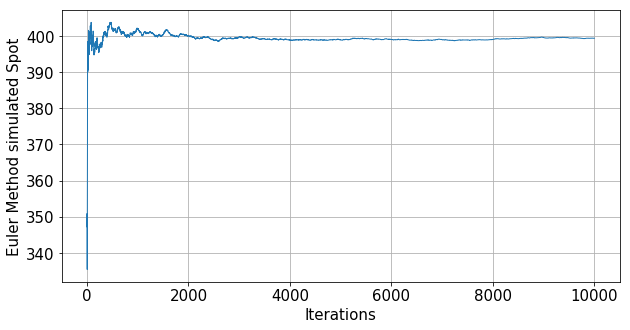

In [16]:
#plot discounted Convergence vs number of iterations
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(iteration1,Convergence1,lw=1)
plt.xlabel('Iterations')
plt.ylabel('Euler Method simulated Spot');
print('\n\n Call Option value using Euler Method : {}'.format(C1))